# Ford GoBike System Data
## by Ritu Jain

## Preliminary Wrangling

The data used in this project is for Feb,2019. The data consisted of ride durations and attributes of approximately 183412 rides. The attributes included start time, end time, user type, birth year, start station , end station. 

* Start_time and end_time are in object format rather than datetime format. Also binning into 4 bins of 6 hours each
* start_station_id and end_station_id  are in float format.Rather they should be in object format
* bike_id is in int format, should be in object format


In [246]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [105]:
# Loading the dataset
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [106]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.dtypes)
print(bike.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [107]:
# Converting start and end_time to datetime fomat
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

# Converting start_station_id  and end_station_id  to string type
bike['start_station_id'] = bike['start_station_id'].astype(str)
bike['end_station_id'] = bike['end_station_id'].astype(str)


In [108]:
# Adding age column to the dataset
now = pd.Timestamp('now')
yr = now.year


# calcualting age of riders
bike['age']= yr-bike['member_birth_year']


In [109]:
# Binning the time of day into 4 bins
bins = [0, 6, 12, 18, 24]
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
bike['time_bin'] = pd.cut(bike['start_time'].dt.hour, bins, labels=labels, right=False)

# Adding daytype column to the dataset.
bike['daytype']= np.where(bike['start_time'].dt.weekday <5 ,'weekday' ,'weekend' )

# setting the time_bin into order

ordered_time= pd.api.types.CategoricalDtype(categories=labels, ordered= True)
bike['time_bin'] = bike['time_bin'].astype(ordered_time)

In [110]:
# descriptive statistics for numeric variables
print(bike.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude        bike_id  \
count         183412.000000          183412.000000  183412.000000   
mean              37.771427            -122.352250    4472.906375   
std                0.099490               0.116673    1664.383394   
min               37.317298            -122.453704      11.000000 

### What is the structure of your dataset?

> There are 183412 records of ford go bike system data with 15 features.These are the mix of qualitative and quantitative data

### What is/are the main feature(s) of interest in your ataset?

> What is the average bike ride duration?
> Weekend vs weekday ridership?
> Which user_type rides more?
> which age group and gender class uses most of the service?




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, start_time, user_type, member_birth_year, member_gender

## Univariate Exploration

I'll start by looking at the distribution of the one of the main variable of interest: duration_sec..

### Q1: What is the average bike ride duration?

In [38]:
bike['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

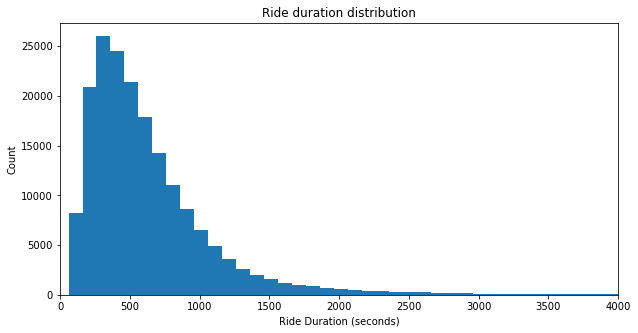

In [247]:
plt.figure(figsize =[10,5])
binsize = 100
bins = np.arange(61,bike['duration_sec'].max()+binsize,binsize)
plt.hist(bike['duration_sec'], bins = bins)
plt.xlim((0,4000))
plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Count')
plt.title('Ride duration distribution')
plt.show()


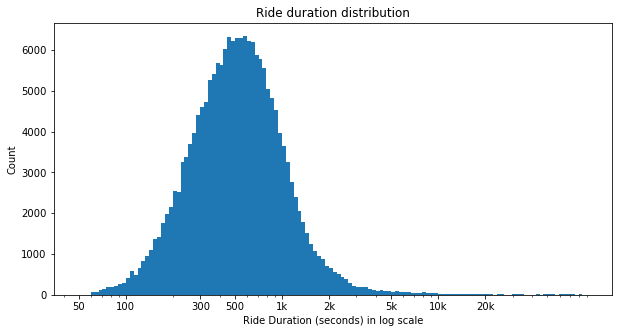

In [249]:
# there's a long tail in the distribution, so let's put it on a log scale instead
plt.figure(figsize =[10,5])
binsize_log = 0.025
bins=10** np.arange(1.7,np.log10(bike['duration_sec'].max())+binsize_log,binsize_log)
plt.hist(bike['duration_sec'], bins = bins)
plt.xscale('log')
plt.xticks([50,100,300,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,300,500, '1k', '2k', '5k', '10k', '20k'])
#plt.xlim((0,2e4))
plt.xlabel('Ride Duration (seconds) in log scale')
plt.ylabel('Count')
plt.title('Ride duration distribution')
plt.show()

In [253]:
# stats for duration_sec column

bike['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

The max value is far away from 75 %ile. There are many outliers. 
To handle this lets remove all the records having duration_sec more than in 99 %ile

In [146]:
# fetching records till 99th percentile
bike_99= bike[bike['duration_sec'].between(bike['duration_sec'].quantile(0),bike['duration_sec'].quantile(.99))]

# Age greater than 100 would practically be outliers. Removing them too
bike_final= bike_99[bike_99['age']<= 100]

* Duration_sec has a long tailed distribution with lot of durations at lower end and a few at higher end. When plotted on a log scale, the duration has normal distribution with peak around 500 seconds. 

Next lets look at distribution of rides across time_bin , weekend or not, user_type and member_gender

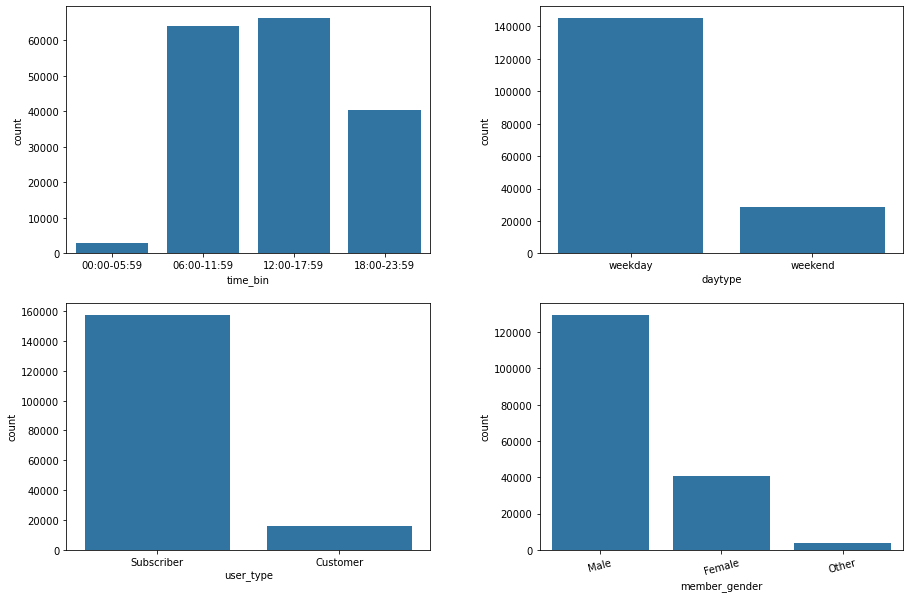

In [255]:
color_base = sb.color_palette()[0]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize =[15,10])
plt.subplots_adjust(wspace=0.3, hspace=0.2)
sb.countplot(data = bike_final , x = 'time_bin', color= color_base, ax=ax[0,0])
sb.countplot(data = bike_final , x = 'daytype', color= color_base, ax=ax[0,1])
sb.countplot(data = bike_final , x = 'user_type', color= color_base, ax=ax[1,0])
sb.countplot(data = bike_final , x = 'member_gender', color= color_base, ax=ax[1,1])

plt.xticks(rotation=15)
plt.show()


* Most of rides are happening between 6am - 6pm.That's how it mostly should as more people are their on the road on different avenues of commute.
* During weekdays more rides are happening which also totally makes sense.
* Subscriber are more using bikes than customer.
* Males are also using more bikes than other genders

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The ride duration took on a large range of values, so I looked at the data using log transform. Under the transformation, the data had normal distribution with peak around 500sec

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigation the ride_duration values,that are 1835 records having higher values than 20000.Also there were 75 rows where age is more than 100. To eliminate these outlier and get a consistent outcome, I have taken records till 99%ile of duration_sec values. Filtered data set is named as 'bike_final'

## Bivariate Exploration

To start off I want to look at the pairwise correlation present between features in the data.

In [156]:
numeric_vars = ['duration_sec', 'age']
categoric_vars = ['user_type', 'member_gender','daytype', 'time_bin']

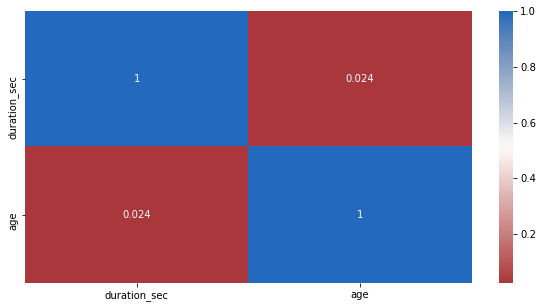

In [256]:
# Correlation plot

plt.figure(figsize=[10,5])
sb.heatmap(bike_final[numeric_vars].corr(), annot= True, cmap = 'vlag_r');

There is not enough evidence of correlation between age of rider and ride duration

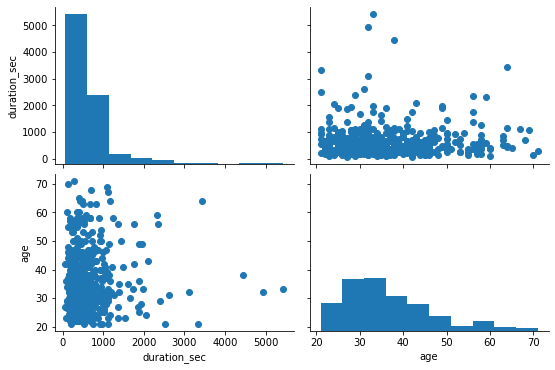

In [257]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(bike_final.shape[0],500, replace = False)
bike_sample = bike.loc[samples,:]

g =sb.PairGrid(data = bike_sample,vars= numeric_vars, aspect = 1.5, height = 2.5 )
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

As expected the people with age between approx 25-35 years are riding the bikes more.

There isn't any stronger correlation between age and ride_duration 

Let's move on the relationship between ride_duration and age vs categorical variables

<Figure size 504x360 with 0 Axes>

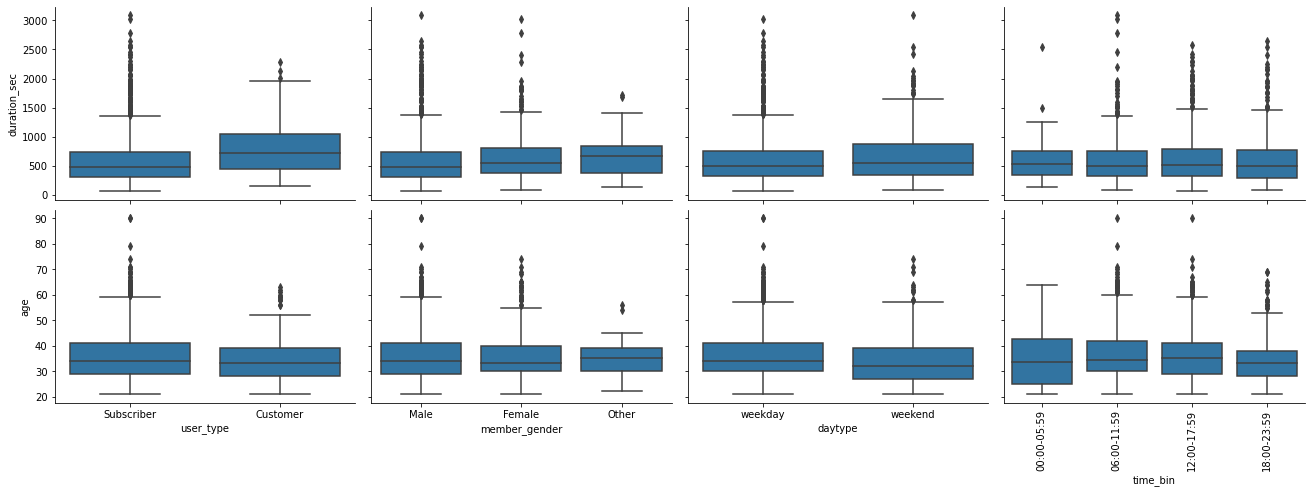

In [266]:
# plotting box plots for relationship between numerical and categorical variable
samples = np.random.choice(bike_final.shape[0], 2000, replace = False)
bike_final_samp = bike_final.reindex(index = samples)
plt.figure(figsize=[7,5])
def boxgrid(x,y,**kwargs):
    base_color=sb.color_palette()[0]
    sb.boxplot(x,y,color = base_color)

g = sb.PairGrid(data = bike_final_samp, x_vars = categoric_vars, y_vars = numeric_vars,aspect=1.5, height=3 )
g.map(boxgrid)
plt.xticks(rotation = 90)
plt.show();


Interstingly, although more subscribers are riding on go-bikes but their average ride duration is less than those of non-subscribers.For subscribers their avg duration is 613 sec and for non-subscribers its 1125 sec.

Finally, let's look at relationships between the four categorical features.

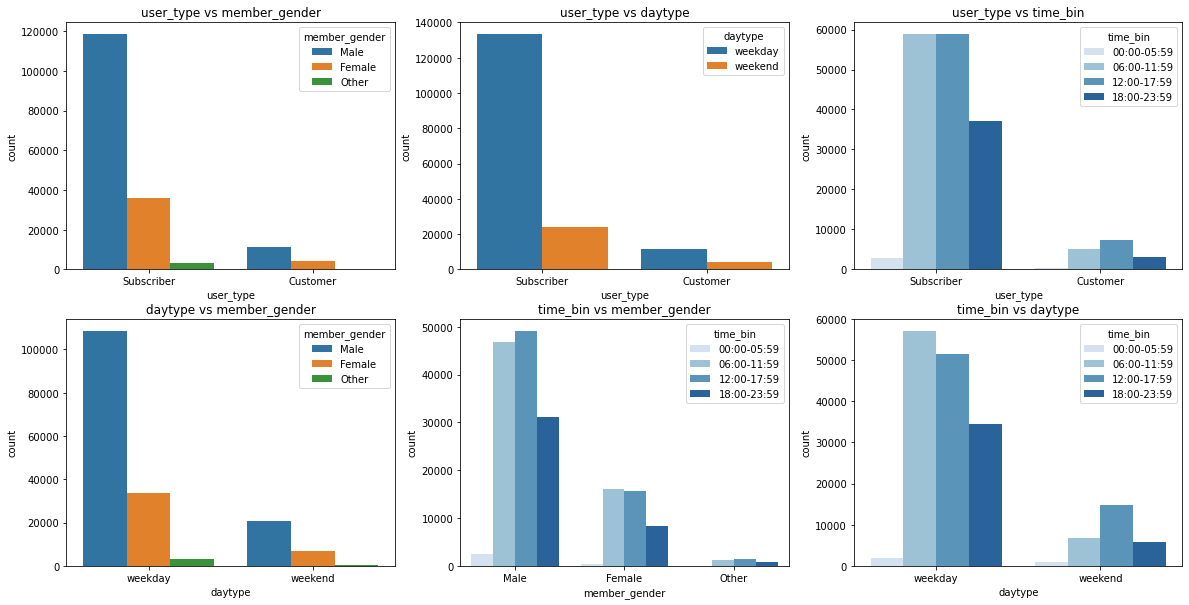

In [262]:
# Categorical variables are 'user_type', 'member_gender','daytype', 'time_bin'
# plotting count plots

plt.figure(figsize = [20,10])

# subplot 1: user_type vs member_gender
plt.subplot(2,3,1)
sb.countplot(data = bike_final, x = 'user_type' , hue ='member_gender')
plt.title('user_type vs member_gender')

# subplot 2: user_type vs daytype
plt.subplot(2,3,2)
sb.countplot(data = bike_final, x = 'user_type' , hue ='daytype')
plt.title('user_type vs daytype')

# subplot 3: user_type vs time_bin
plt.subplot(2,3,3)
sb.countplot(data = bike_final, x = 'user_type' , hue ='time_bin', palette = 'Blues')
plt.title('user_type vs time_bin')

# subplot 4: member_gender vs daytype
plt.subplot(2,3,4)
sb.countplot(data = bike_final,x = 'daytype' , hue ='member_gender' )
plt.title('daytype vs member_gender')

# subplot 5: member_gender vs time_bin
plt.subplot(2,3,5)
sb.countplot(data = bike_final,x = 'member_gender' , hue ='time_bin', palette = 'Blues' )
plt.title('time_bin vs member_gender')

# subplot 6: daytype vs time_bin
plt.subplot(2,3,6)
sb.countplot(data = bike_final,x = 'daytype' , hue ='time_bin' , palette = 'Blues')
plt.title('time_bin vs daytype');


Third plot reveals that number of  rides are peak between 12pm-6pm in a given day.
Males have largest share in subscriber and customer base.

Lets find if age and member gender shows some relationship in terms of count of rides

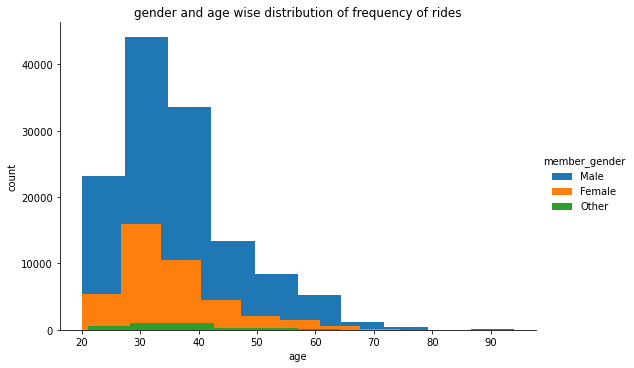

In [264]:
# age and member facetgrid plot

g= sb.FacetGrid(data = bike_final , hue = 'member_gender', aspect= 1.5, height= 5)
g.map(plt.hist , 'age')
g.add_legend()
plt.xlabel('age')
plt.ylabel('count')
plt.title('gender and age wise distribution of frequency of rides');

25-35 years of people are mostly riding the bikes with males predominant in gender section.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Bike demand is higher in weekdays as compared to weekends
Males avail most of the services
Subscriber base are mostly using this service

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As expected the people with age between approx 25-35 years are riding the bikes more.
Interstingly, although more subscribers are riding on go-bikes but their average duration is less than those of non-subscribers.For subscribers their avg duration is 613 sec and for non-subscribers its 1125 sec.
Third plot reveals that customers rides are peak between 12pm-6pm in a given day. Males have largest share in subscriber and customer base.
Weekdays has more demand during 6am-12pm while weekend has it more between 12pm-6pm

## Multivariate Exploration

We have observed that age and duration_sec doesn't have any strong correlation. I want to see if we get any meaningful insight if user_type is added.

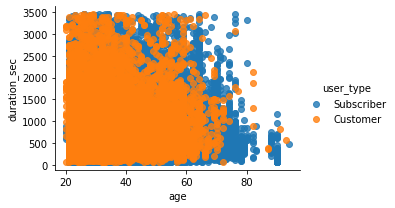

In [265]:
# numeric- age, duration_sec , categoric - user_type

g = sb.FacetGrid(data = bike_final, hue = 'user_type', height = 3, aspect=1.5)
g.map(sb.regplot,'age', 'duration_sec', fit_reg = False)
g.add_legend()

Still there exists no strong correlation evenif user_type is added.

Earlier we saw that for mean ride duration for non-subscribers(customers) is more than that of subscribers. In totallity there are more males riding the bikes than females. Now we want to see the for each user type what is the distribution mean ride duration for each of gender class.

Text(0.5, 1.0, 'Mean ride duration for different user types and genders')

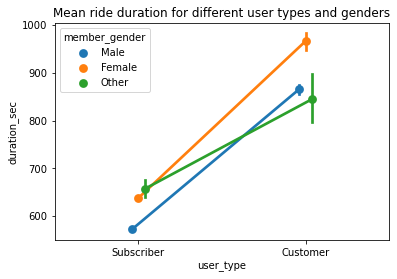

In [244]:
# user_type, member_gender, duration_sec
sb.pointplot(data = bike_final, x = 'user_type', y = 'duration_sec' , hue = 'member_gender'
            ,dodge= True)
plt.title('Mean ride duration for different user types and genders')

In both user_type segments females have more ride time(duration_sec) than males.

Previously we saw that weekdays has more bike demand over weekends and mean riding duration is pretty much same in weekends or weekdays.
Now lets see for each of day of week and hour of a day what is the distribution of ride duration. This can be achieved using heatmap

In [240]:
# Finding the start_day of week
bike_final['start_day']= bike_final['start_time'].dt.day_name()

# ordering the start_day of week
day_label = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_label_order= pd.api.types.CategoricalDtype(categories= day_label, ordered= True)
bike_final['start_day'] = bike_final['start_day'].astype(day_label_order)

# Finding start time hour
bike_final['start_time_hour']= bike_final['start_time'].dt.hour

# Calculating ride duration in minutes and adding a new column
bike_final['duration_min']= round((bike_final['duration_sec']/60),2)


Text(0.5, 1.0, 'mean trip duration by day of week and hour')

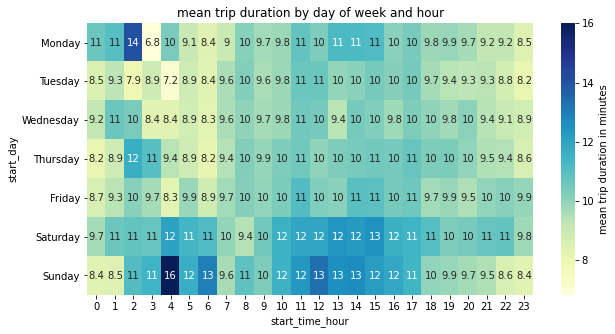

In [242]:
data= pd.DataFrame(bike_final.groupby(['start_day','start_time_hour']).mean()['duration_min'])
data = data.reset_index()

bike_pivot  = data.pivot_table(values = 'duration_min',index = 'start_day', columns='start_time_hour')
plt.figure(figsize=[10,5])
sb.heatmap(bike_pivot, annot = True  , cmap="YlGnBu", cbar_kws={"label":'mean trip duration in minutes'} )
plt.title('mean trip duration by day of week and hour')

As seen from heat plot weekends have more mean trip duration spread throughout the day. However for weekdays there is a spurt in demand for few hours in the mornings and evenings

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I tried to investigate if age and ride duration has some correlation. Doing bivariate analysis confirmed it has no realtion, then I added user_type to it to see whether in a user class their is some correlation. Coincidentally there exist to be no relation.

Another important insight I got was, although females are fewer in number as compared to males, but they are driving for the longer duration in both user_type segments



### Were there any interesting or surprising interactions between features?

Univariate analysis showed Weekdays has more demand for bike rides over weekend.Bivariate analysis suggested that  the mean ride duration for both weekdays and weekends are almost same.And when this is further broken into day of week vs hour of day, to see the mean ride duration, it showed that mean ride duration for most of hours in a weekend is more than weekdays